In [ ]:
%pip install accelerate bitsandbytes

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
import numpy as np
import math

from huggingface_hub import notebook_login
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import torch


import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer

from matplotlib import pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


<div class="alert alert-block alert-info">
 <h3>Generate # of documents.</h3>
</div>

In [ ]:
notebook_login()

In [ ]:
BASE_MODEL = "openai-community/gpt2" #"meta-llama/Llama-2-7b-hf"
PROMPT = r"### Instruction:\n Please Write me a professional blog about this exciting topic: \n"
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

def prompt(topic):
  return f"{PROMPT} {topic}"
DEVICE

'cuda'

In [ ]:
# compute_dtype = getattr(torch, "float16")

# quant_config = BitsAndBytesConfig(
#     load_in_8bit=True,
#     bnb_8bit_quant_type="nf8",
#     bnb_8bit_compute_dtype=compute_dtype,
#     bnb_8bit_use_double_quant=False,
# )

In [ ]:
# del model
# del tokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)

model = AutoModelForCausalLM.from_pretrained(
    BASE_MODEL)
    # quantization_config=quant_config,
    # device_map=DEVICE)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
model = model.to(DEVICE)

In [ ]:
def generate_text(
    title : str
    ) -> str:
    input_ids = tokenizer.encode(prompt(title), return_tensors='pt').to(DEVICE)
    output = model.generate(input_ids, max_length=228, num_return_sequences=3, do_sample = True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text.replace(prompt(title), "") #max([text['generated_text'] for text in generated_text])

In [ ]:
titles = ["egypt?", "human wrights", "abraham lincoln?"]
doc = generate_text(titles[2])
print(doc)

In [ ]:
# docs = list()

In [ ]:
docs.append(doc)

In [ ]:
docs = ["> Dear Readers,\nToday, we are publishing a post titled, What do you know about the egyptian pyramids (and why you like them) and have a fun little post about it -\xa0\nI have a quick question (sorry that it hasn't been answered for me...) and I want to give you something to think about about the new pyramids as we know them for the first time:\nI remember something in school a few years after the birth because the teacher told me about the Egyptian pyramid in the classroom, that it was all of the pyramids, the pyramids that are in the south are connected on their own to the Nile... Well, that's all I have now... So, I asked for your email address. I wanted to get your thoughts on a few of the ancient monuments of the East Coast of East Anglia for the first time: These monuments were created by Egyptians who built them in a very very narrow space. A few decades later, I would write",
 'haker \\n You may also contact me at :\\n <url href=http://forums.humanwrightshaker.net/index.php> <br/>\n\n\nWelcome to Human Wrightshaker\n\nA company dedicated to providing professional human wrightshaker products and services through various online communities. We offer a wide variety of free and premium offers for all types of professionals from beginner, to business, to social-media, to hobby-based design/design.\n\nAs the leading professional human wrightshaker forums for all kinds of information, the site provides users with the most comprehensive list of online forums devoted to your career, including:\n\nthe popular (and sometimes obscure) human wrightshaker forums that exist in the human hobby community\n\nthe great human wrightshaker forums dedicated to human engineering (in-depth articles, reviews and general discussions)\n\nthe great and popular social-worries forums aimed at helping you design better projects\n\nthe awesome human',
 ' How did that happen? \\r Abraham L. Lincoln was born in 1834, in an eastern Pennsylvania village called "East Carolina." He attended the College of William and Mary and graduated in 1836. Within one month of his high school graduation, Lincoln received a bachelor\'s in English from Oxford University. One and a half decades later, Lincoln was elected Governor of North Carolina, where his campaign started. He eventually won elections to the House in 1870 and to the Senate in 1882, winning again. Although Lincoln was a Democrat, he did not run for president. However, he did win the White House. With his nomination to the United States Supreme Court, the first of his political career came in 1881. Lincoln held office as Speaker of the House from 1887 to 1898. In that year, at the age of 45, he was elected to his first term in the House of Representatives. Lincoln held all two terms of his second term. This was his second term as President of the United States. Lincoln went']

<div class="alert alert-block alert-info">
 <h3>Applying Preprocessing.</h3>
</div>

In [ ]:
# Punctuations to be cleaned from our text
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

# English stop words with nltk
stop_words = stopwords.words('english')

# Lemmatizer
lemmatizer = WordNetLemmatizer()


In [ ]:
def preprocess(
    text : str,
    stemmer_name : str = None
    ) -> list:
    #remove punctuations / cleaning
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    # #remove English stopping words & Normalization & tokenization
    text = [word.lower() for word in text.split()]
    text = [word for word in text if word not in stop_words]
    # # lemmatization
    lemmas = [lemmatizer.lemmatize(word) for word in text]

    return [lemma for lemma in lemmas if 20 > len(lemma) >= 3]

In [ ]:
[preprocess(doc) for doc in docs]

[['dear',
  'reader',
  'today',
  'publishing',
  'post',
  'titled',
  'know',
  'egyptian',
  'pyramid',
  'like',
  'fun',
  'little',
  'post',
  'quick',
  'question',
  'sorry',
  'hasnt',
  'answered',
  'want',
  'give',
  'something',
  'think',
  'new',
  'pyramid',
  'know',
  'first',
  'time',
  'remember',
  'something',
  'school',
  'year',
  'birth',
  'teacher',
  'told',
  'egyptian',
  'pyramid',
  'classroom',
  'pyramid',
  'pyramid',
  'south',
  'connected',
  'nile',
  'well',
  'thats',
  'asked',
  'email',
  'address',
  'wanted',
  'get',
  'thought',
  'ancient',
  'monument',
  'east',
  'coast',
  'east',
  'anglia',
  'first',
  'time',
  'monument',
  'created',
  'egyptian',
  'built',
  'narrow',
  'space',
  'decade',
  'later',
  'would',
  'write'],
 ['haker',
  'may',
  'also',
  'contact',
  'url',
  'welcome',
  'human',
  'wrightshaker',
  'company',
  'dedicated',
  'providing',
  'professional',
  'human',
  'wrightshaker',
  'product',
  '

In [ ]:
processed_docs = [" ".join(preprocess(doc)) for doc in docs]
for doc, title in zip(processed_docs, titles):
  print(f"{title} :\n{doc}\n\n")

egypt? :
dear reader today publishing post titled know egyptian pyramid like fun little post quick question sorry hasnt answered want give something think new pyramid know first time remember something school year birth teacher told egyptian pyramid classroom pyramid pyramid south connected nile well thats asked email address wanted get thought ancient monument east coast east anglia first time monument created egyptian built narrow space decade later would write


human wrights :
haker may also contact url welcome human wrightshaker company dedicated providing professional human wrightshaker product service various online community offer wide variety free premium offer type professional beginner business socialmedia hobbybased designdesign leading professional human wrightshaker forum kind information site provides user comprehensive list online forum devoted career including popular sometimes obscure human wrightshaker forum exist human hobby community great human wrightshaker forum 

In [ ]:
# length of each doc befor preprocessing and after
list(zip([len(doc.split()) for doc in docs], [len(doc.split()) for doc in processed_docs]))

[(171, 68), (130, 82), (173, 93)]

<div class="alert alert-block alert-info">
 <h3>Getting unique words.</h3>
</div>

In [ ]:
def get_unique_words(
    words:list
    ) -> list:
    return [*set(words)]

In [ ]:
unique_worded_docs = [get_unique_words(doc.split()) for doc in processed_docs]

# wrapping up all docs unique words
unique_words = sum(unique_worded_docs, [])
unique_words = get_unique_words(unique_words)

unique_worded_docs = [" ".join(doc) for doc in unique_worded_docs]
unique_worded_docs

['teacher built quick get first space fun time school know little hasnt sorry told classroom want thought would today answered publishing created thats egyptian birth dear east question coast wanted connected south post asked think year give monument pyramid address titled narrow nile write new later remember email something anglia decade like well reader ancient',
 'article socialmedia exist providing type review including great discussion online aimed information community free designdesign may leading hobbybased beginner business professional contact career awesome provides design wrightshaker welcome variety general helping company engineering haker list offer user forum url devoted comprehensive wide various hobby project premium also dedicated obscure site kind sometimes service product indepth better socialworries human popular',
 'bachelor called mary half election representative 1836 university first president elected school graduated attended oxford court held 1898 age democr

In [ ]:
len(unique_words)

179

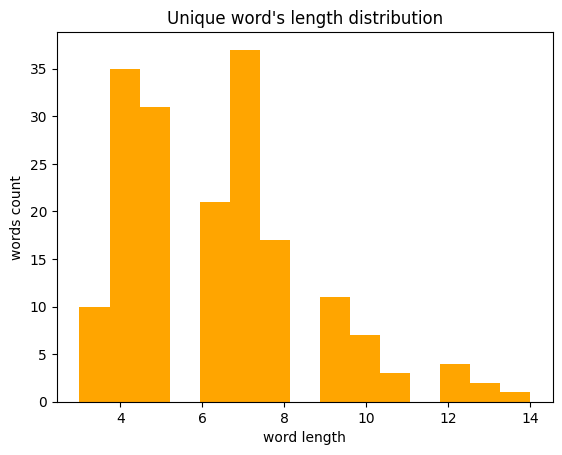

In [ ]:
plt.hist(list(map(len, unique_words)), bins=15, color='orange')
plt.xlabel("word length")
plt.ylabel("words count")
plt.title("Unique word's length distribution")
plt.show()

In [ ]:
list(filter(lambda word: len(word) >= 10, unique_words))

['university',
 'engineering',
 'publishing',
 'wrightshaker',
 'discussion',
 'socialmedia',
 'professional',
 'pennsylvania',
 'graduation',
 'information',
 'hobbybased',
 'eventually',
 'socialworries',
 'nomination',
 'comprehensive',
 'designdesign',
 'representative']

<div class="alert alert-block alert-info">
 <h3>TF-IDF from SKLEARN</h3>
</div>

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(processed_docs)
X = vectorizer.transform(processed_docs)
print(X.T.shape)
tf_idf_sk = pd.DataFrame(X.T.toarray(),vectorizer.get_feature_names_out(), titles)

(179, 3)


In [ ]:
tf_idf_sk.sample(15).T

,url,information,devoted,new,coast,question,write,service,high,career,representative,online,engineering,political,attended
egypt?,0.000000,0.000000,0.000000,0.098561,0.098561,0.098561,0.098561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
human wrights,0.071506,0.071506,0.071506,0.000000,0.000000,0.000000,0.000000,0.071506,0.000000,0.054382,0.000000,0.143011,0.071506,0.000000,0.000000
abraham lincoln?,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076076,0.057858,0.076076,0.000000,0.000000,0.076076,0.076076


In [ ]:
built_in_words = set(vectorizer.get_feature_names_out())
print(*built_in_words)

called mary providing president great graduated online sorry court told aimed age thought democrat created thats may hobbybased dear graduation 1887 connected provides william wrightshaker 1834 haker pyramid carolina white project one also decade lincoln started better indepth reader happen held article socialmedia 1836 quick university first school discussion know little 1898 want publishing office campaign professional college although question career design company engineering year term offer forum win united write remember came sometimes service well went english 1882 month state bachelor teacher representative type get fun information community today free leading political birth east coast wanted two welcome post pennsylvania asked general helping second think give monument high speaker wide village premium eventually later supreme winning within dedicated email obscure something anglia kind socialworries north abraham human popular built half election exist review space elected i

<div class="alert alert-block alert-info">
 <h3>TF-IDF implementation from scratch</h3>
</div>

In [ ]:
def sentExist(word,sent):
  count=0
  for i in sent.split():
    if i == word:
      count+=1

  return count

In [ ]:
def docsExist(word,docs):
  counter = 0
  for i in docs:
    if word in i.split():
      counter +=1
  return counter

In [ ]:
def tf_count(uniq_words,docs):
  tf_mat = np.zeros((len(uniq_words),len(docs)))
  for i in range(len(uniq_words)):
    for j in range(len(docs)):
      tf_mat[i,j] = (sentExist(uniq_words[i],docs[j]))

  return tf_mat.astype(int)

In [ ]:
pd.DataFrame(tf_count(unique_words,processed_docs),index = unique_words, columns=titles).sample(10).T

,year,started,office,north,monument,election,speaker,hobby,email,titled
egypt?,1,0,0,0,2,0,0,0,1,1
human wrights,0,0,0,0,0,0,0,1,0,0
abraham lincoln?,1,1,1,1,0,1,1,0,0,0


In [ ]:
def idf_single( unique_words,all_docs):

    n_docs = len(all_docs)
    len_words = len(unique_words)
    idf = np.zeros(len_words)
    for i in range(len(unique_words)):
        frq = docsExist(unique_words[i],docs)
        idf[i] = math.log(float(n_docs + 1) / float(frq + 1)) + 1
    return idf.reshape(-1,1)

In [ ]:
pd.DataFrame(idf_single(unique_words,unique_worded_docs),index = unique_words).sample(10).T

,engineering,second,told,attended,beginner,hasnt,democrat,want,asked,1870
0,1.693147,1.693147,1.693147,1.693147,2.386294,2.386294,2.386294,1.693147,1.693147,1.693147


In [ ]:
# tf - idf with normalization
tf_= tf_count(unique_words,unique_worded_docs)
idf_=idf_single(unique_words,unique_worded_docs)
tf_idf = idf_*tf_
# normalization
norm  =np.sqrt((tf_idf*tf_idf).sum(axis=0))
tf_idf_df = pd.DataFrame(tf_idf/norm,index = unique_words, columns=titles)

In [ ]:
tf_idf_df.shape

(179, 3)

In [ ]:
tf_idf_df.sample(15).T

,pennsylvania,give,teacher,also,variety,white,one,representative,started,united,dedicated,url,premium,1898,address
egypt?,0.000000,0.11557,0.11557,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162882
human wrights,0.000000,0.00000,0.00000,0.111317,0.111317,0.000000,0.000000,0.000000,0.000000,0.000000,0.111317,0.156889,0.111317,0.000000,0.000000
abraham lincoln?,0.134008,0.00000,0.00000,0.000000,0.000000,0.134008,0.095082,0.134008,0.134008,0.134008,0.000000,0.000000,0.000000,0.134008,0.000000


In [ ]:
tf_idf_df.loc['address'],tf_idf_sk.loc['address']

(egypt?              0.162882
 human wrights       0.000000
 abraham lincoln?    0.000000
 Name: address, dtype: float64,
 egypt?              0.098561
 human wrights       0.000000
 abraham lincoln?    0.000000
 Name: address, dtype: float64)

In [ ]:
list(set(unique_words).difference(built_in_words))

[]